In [2]:
import pandas as pd

data=pd.read_csv('large_cap.csv')

In [8]:
import numpy as np
import scipy

def sigSignal(pSeries,short,long,p):
    df=pSeries.to_frame()
    df.columns=['price']
    df['returns']=df.price.pct_change()
    df['s_long']=df.returns.rolling(long).std()
    df['s_short']=df.returns.rolling(short).std()
    chi_l=scipy.stats.chi2.ppf(p,long-1)
    df['sig_ceiling']=((long-1)*df['s_long']**2/chi_l)**.5
    df['signal']=np.where(df.s_short>df.sig_ceiling,True,False)
    return df.signal

In [9]:
import strategy as s

uSig=s.backtest(data['AAPL'],22,62,.01).signal
sSig=sigSignal(data['AAPL'],22,62,.01)

In [10]:
final=np.where(sSig,uSig,'-')
final

array(['-', '-', '-', ..., '-', '-', '-'], dtype=object)

In [18]:
position=s.getPosition(final)

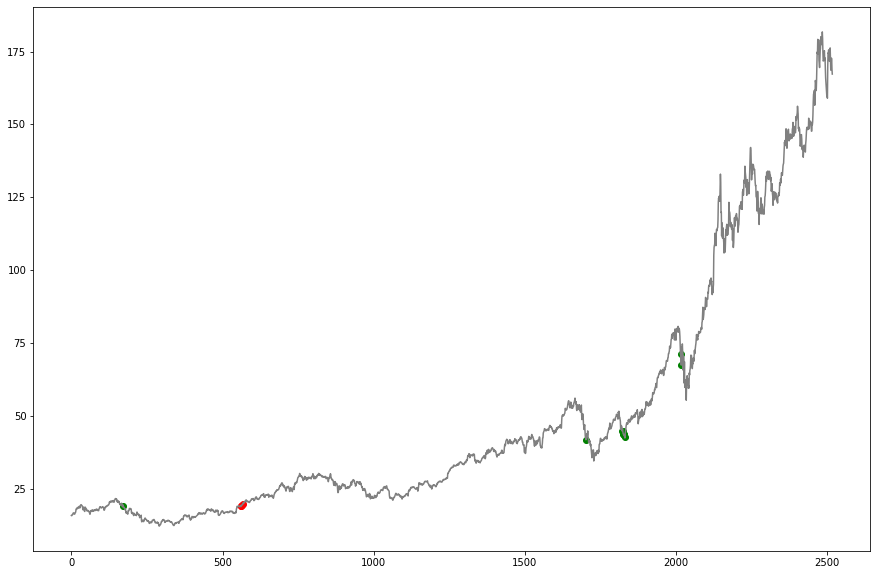

In [29]:
import matplotlib.pyplot as plt

pSeries=data['AAPL']
posSeries=np.where(position=='bought',pSeries,float('nan'))
signal=pd.Series(final)
buySignalIndeces=signal[signal=='buy'].index
sellSignalIndeces=signal[signal=='sell'].index

plt.figure(figsize=(15,10))
plt.plot(pSeries.index,pSeries,color='grey')
# plt.plot(pSeries.index,posSeries,color='green')
plt.scatter(buySignalIndeces,pSeries[buySignalIndeces],color='green')
plt.scatter(sellSignalIndeces,pSeries[sellSignalIndeces],color='red')

In [28]:
len(signal[signal=='sell'])

4

In [38]:
rollingMin=pSeries.rolling(30).min()
isMin=pSeries==rollingMin
isMin

0       False
1       False
2       False
3       False
4       False
        ...  
2513    False
2514    False
2515    False
2516    False
2517    False
Name: AAPL, Length: 2518, dtype: bool

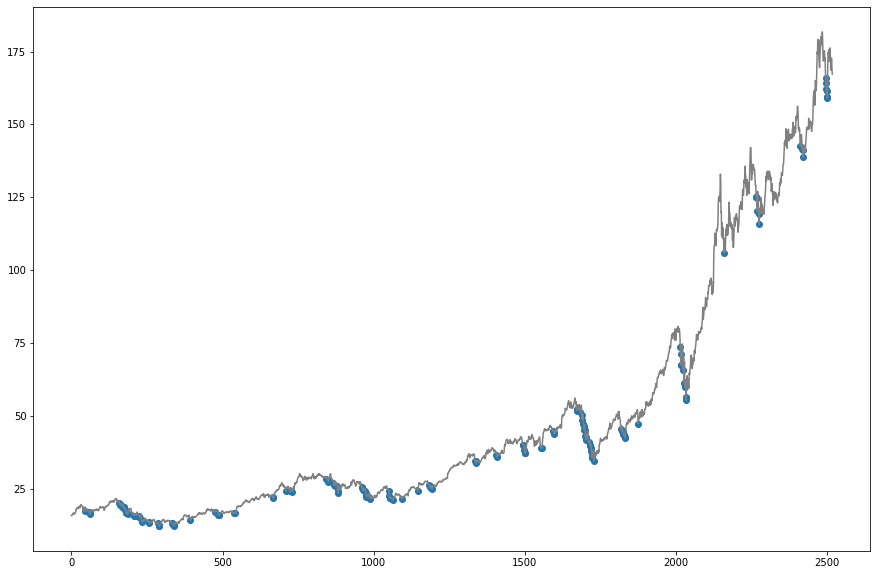

In [39]:
plt.figure(figsize=(15,10))

plt.plot(pSeries.index,pSeries,color='grey')
plt.scatter(isMin[isMin].index,pSeries[isMin])